In [1]:
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

In [2]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)

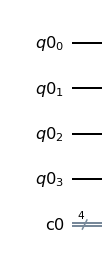

In [3]:
%matplotlib inline
qc.draw(output='mpl')

In [4]:
def make_entanglement(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

In [5]:
def make_communicate(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

In [6]:
make_entanglement(qc, 0, 1)
make_entanglement(qc, 2, 3)
qc.barrier()

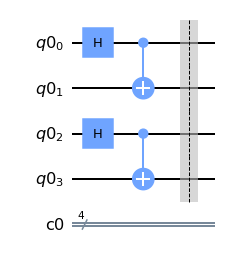

In [7]:
qc.draw(output='mpl')

In [8]:
make_communicate(qc, 1, 2)
qc.barrier()

In [9]:
def measure_pair(qc, a, b):
    qc.measure(a, a)
    qc.measure(b, b)

In [10]:
measure_pair(qc, 1, 2)

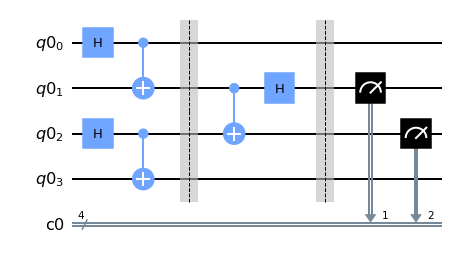

In [11]:
qc.draw(output='mpl')

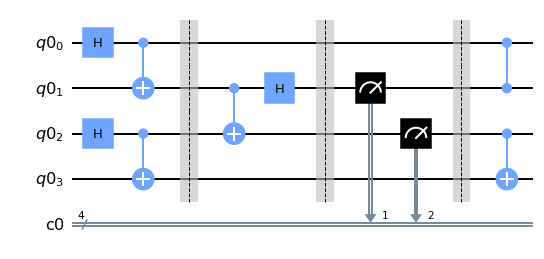

In [12]:
qc.barrier()
qc.cz(1, 0)
qc.cx(2, 3)
qc.draw(output='mpl')

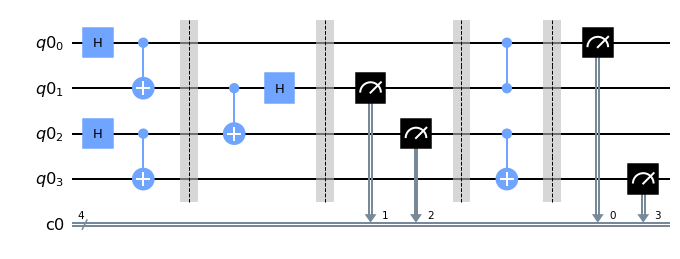

In [13]:
qc.barrier()
qc.measure(0, 0)
qc.measure(3, 3)
qc.draw(output='mpl')

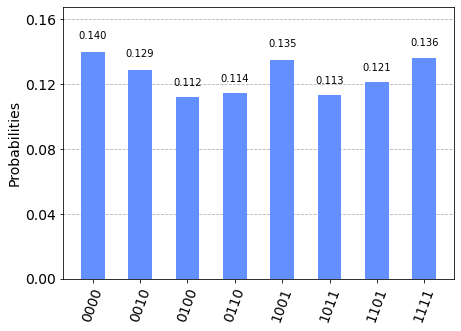

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

In [15]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

In [16]:
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


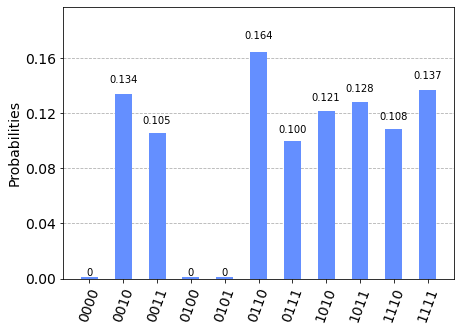

In [19]:
result = job.result()
plot_histogram(result.get_counts(qc))